In [ ]:
!pip install spacy

In [1]:
import pandas as pd
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/kristinapermikina/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/kristinapermikina/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/kristinapermikina/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/kristinapermikina/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/kristinapermikina/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/kristinapermikin

True

In [2]:
DATA_PATH = "./data"

data_with_delimiters = {
    "Ekons_done.csv": {
        "delimiter": "\t",
        "encoding": "utf-8"
    },
    "HH_ru_complete.csv" : {
        "delimiter": ",",
        "encoding": "utf-8"
    },
    "incrussia_2021_2024.csv": {
        "delimiter": "\t",
        "encoding": "utf-16"
    },
    "RB_ru_p1.csv": {
        "delimiter": ",",
        "encoding": "utf-8"
    },
    "RB_ru_p2.csv": {
        "delimiter": ",",
        "encoding": "utf-8"
    },
    "RB_ru_p3.csv": {
        "delimiter": ",",
        "encoding": "utf-8"
    },
    "RBC_complete.csv": {
        "delimiter": ",",
        "encoding": "utf-8"
    },
    "superjob_data.csv": {
        "delimiter": ";",
        "encoding": "utf-8"
    },
    "Tadviser_21-24_clean.csv": {
        "delimiter": "\t",
        "encoding": "utf-8"
    },
    "ved_ind.csv": {
        "delimiter": ";",
        "encoding": "utf-8"
    },
    "ved_tech.csv": {
        "delimiter": ";",
        "encoding": "utf-8"
    },
}


In [3]:
!pip install pymystem3

In [35]:
!python -m spacy download ru_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 8.1 MB/s eta 0:00:0000:0100:01
  Using cached pymorphy3-2.0.1-py3-none-any.whl.metadata (1.8 kB)
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl.metadata (7.0 kB)
  Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl.metadata (2.0 kB)
Using cached pymorphy3-2.0.1-py3-none-any.whl (53 kB)
Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)
Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl (8.4 MB)
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [40]:
import spacy
from nltk.corpus import stopwords
from pymystem3  import Mystem
from string import punctuation
from nltk import ngrams

mystem = Mystem()
stop_words = stopwords.words('russian') + ['который', 'несколько', 'однако', 'например', 'очень', 'как', 'abercrombie', 'fitch', 'млн',
                                          'ноябрь', 'апрель', 'август', 'октябрь', 'март', 'июль', 'январь', 'сентябрь', 'что-то', 'также', 'самый', 'из'
                                          , 'за', 'из-за', 'являться', 'около', 'среди', 'часто', 'поэтому', 'то', 'любой', 'поскольку', 'какой', 'согласно',
                                          'https', 'ленобласть', 'только', 'соответственно', 'во', 'по', 'затем', 'значительно']

nlp = spacy.load("ru_core_news_md")

def parse_tokens(text):        
    tokens = mystem.lemmatize(text.lower()) 
    tokens = [token.strip() for token in tokens if token not in stop_words  
                and token.strip() not in punctuation  
                and len(token) > 4 
                and not token.strip().isnumeric()]

    return ' '.join(tokens)


In [41]:
dictionary = {}
dfs = []

for (file_name, meta) in data_with_delimiters.items():
    print(f"Обработка файла - {file_name}")
    
    df = pd.read_csv(f'{DATA_PATH}/{file_name}', 
                        encoding=meta["encoding"], 
                        delimiter=meta['delimiter'])
    
    df['text'] = df['text'].astype(str)
    df['text'] = df['text'].apply(parse_tokens)

    dfs.append(df)

df = pd.concat(dfs)


Обработка файла - Ekons_done.csv
Обработка файла - HH_ru_complete.csv
Обработка файла - incrussia_2021_2024.csv
Обработка файла - RB_ru_p1.csv
Обработка файла - RB_ru_p2.csv
Обработка файла - RB_ru_p3.csv
Обработка файла - RBC_complete.csv
Обработка файла - superjob_data.csv
Обработка файла - Tadviser_21-24_clean.csv
Обработка файла - ved_ind.csv
Обработка файла - ved_tech.csv


In [43]:
!pip install -U scikit-learn

## Преобразуем текста в вектора

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#конструктор класса, передаем метод класстеризации , метод преобразования текста в векторы, понизить размерность метода до двух 

class Clusterization:  
    #конструктор который создает объект и принимает на вход (метод класстеризации векторизации и названия графика и сохраняет в переменные (сохранить себе))
    def __init__(self, clusterization_method, vectorizer, plot_title):
        self.clusterization_method = clusterization_method
        self.vectorizer = vectorizer
        self.pca = PCA(n_components=2) #понизить размерность метода до двух (чтоб на двумерном графике нарисовать)
        self.plot_title = plot_title
        
    
    def __draw_scatter(self, matrix, labels):
        """
        Метод для отрисовки графика рассеяния
        """
        fig = plt.figure(figsize=(4, 4)) # создаем фигуру 4 на 4
        ax = fig.add_subplot(1,1,1) #добавляем пустой график
        ax.title.set_text(self.plot_title) #заголовок 

        reduced = self.pca.fit_transform(matrix) #преобразуем вектора размера 2 чтобы нарисовать на двухмерном графике
        t = reduced.transpose() #транспонирование матрицы 
        
        scatter = ax.scatter(t[0], t[1], c = labels) #добавляем диаграмму рассения 
        plt.colorbar(scatter) #цветная херня с боку
        plt.show() #вывод графика

   
    def apply(self, dataframe_of_texts):
        """
        Запускает кластеризацию и рисует график разбиения по кластерам
        """
        matrix = self.vectorizer.fit_transform(dataframe_of_texts) #векторизация текста (переменная которая хранит в себе метод векторизации, который будем передавать в конструктор)
        matrix = matrix.toarray() #превращаем матрицу в массив потому что clusterization_method.fit_predict работает с массивами
        labels = self.clusterization_method.fit_predict(matrix) #вызов кластеризации  (fit_predict метод класстеризатора)

        self.__draw_scatter(matrix, labels) 
        
        return labels
        

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class Clusterization:  
   
    def __init__(self, clusterization_method, vectorizer, plot_title):
        self.clusterization_method = clusterization_method
        self.vectorizer = vectorizer
        self.pca = PCA(n_components=2)
        self.plot_title = plot_title
        
    
    def __draw_scatter(self, matrix, labels):
        """
        Метод для отрисовки графика рассеяния
        """
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(1,1,1) 
        ax.title.set_text(self.plot_title)  

        reduced = self.pca.fit_transform(matrix) 
        t = reduced.transpose() 
        
        scatter = ax.scatter(t[0], t[1], c = labels) 
        plt.colorbar(scatter) 
        plt.show() 

   
    def apply(self, dataframe_of_texts):
        """
        Запускает кластеризацию и рисует график разбиения по кластерам
        """
        matrix = self.vectorizer.fit_transform(dataframe_of_texts)
        matrix = matrix.toarray() 
        labels = self.clusterization_method.fit_predict(matrix) 

        self.__draw_scatter(matrix, labels) 
        
        return labels

## Кластеризация

In [50]:
import nltk
import spacy

def top_k_keywords_in_cluster(df = None, n_cluster = 3, min_df = 0.0, max_df = 1.0, k = 10, label_name = 'inner_cluster_labels'):
    for c in range(0, n_cluster):
        subcluster = df[df[label_name] == c] #подкластер кластера 1  
        
        tdf_idf_vec = TfidfVectorizer(stop_words = stop_words, min_df = min_df, max_df = max_df)  
        tfidf_val = tdf_idf_vec.fit_transform(subcluster['text'])   # получаем вектора 
        sorted_keywords = sorted(tdf_idf_vec.vocabulary_, key=lambda x: tfidf_val[0, tdf_idf_vec.vocabulary_[x]], reverse=True)
        doc = nlp(" ".join(sorted_keywords))
        
        keywords = []
        for token in doc:
            if token.pos_ == "NOUN":
                keywords.append(token.lemma_)
    
        keywords = keywords[:k]
        
        print(f'Ключевые слова для кластера {c} \n{" ".join(keywords)}\n')

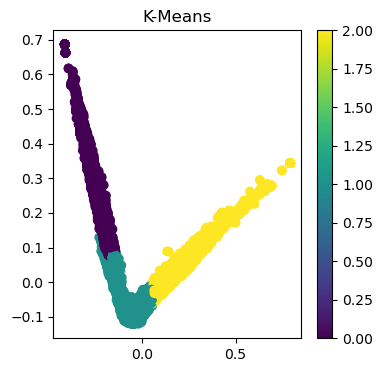

In [47]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

N_CLUSTERS = 3

# Векторизация текста по биграммам
tfidf = TfidfVectorizer(ngram_range=(2,2), max_features=2000) #экспериментальным путем биграммы самых важных тфайдф большой 2000 биграмм которые встречаются в тексте 
kmeans = KMeans(n_clusters=N_CLUSTERS, max_iter=1000, n_init=100) #сколько раз прогнать (создаем экземпляр класса kmeans из библиотеки sklearn
#в которое количество кластеров максимальное количество итераци и сколько раз инецеализировать начальное состояние, это все опытным путем)

cluster = Clusterization(clusterization_method=kmeans, vectorizer = tfidf, plot_title = "K-Means") #это создание экземпляра класса 
#передаем метод класстеризаци kmeans созданный раннее, векторизатор )

labels = cluster.apply(df['text']) #вызов эплай (запускает векторизацию кластеризацию и рисует график и возвращает метки какой текст к какому кластеру принадлежит)

In [48]:
df['labels'] = labels

In [51]:
top_k_keywords_in_cluster(df = df, n_cluster = 3, min_df = 0.10, max_df = 0.95, label_name='labels')

Ключевые слова для кластера 0 
система компания решение время программа месяц продукт рубль директор пресс

Ключевые слова для кластера 1 
человек решение результат работа экономика система исследование большинство вопрос основа

Ключевые слова для кластера 2 
модель работа устройство связь система приложение задача рынок данные защита



In [52]:
cluster_1 = df[df['labels'] == 0]
cluster_2 = df[df['labels'] == 1]
cluster_3 = df[df['labels'] == 2]

## Анализ первого кластера

### Кластеризация первого кластера

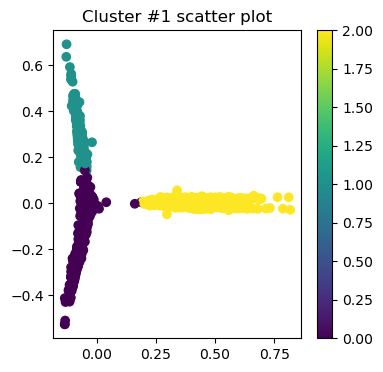

In [62]:
N_SUBCLUSTERS_IN_CLUSTER_1 = 3
tfidf_cluster_1 = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
kmeans_cluster_1 = KMeans(n_clusters=N_SUBCLUSTERS_IN_CLUSTER_1, max_iter=1000, n_init=50)

clusterizator = Clusterization(clusterization_method=kmeans_cluster_1, vectorizer = tfidf_cluster_1, plot_title = "Cluster #1 scatter plot")

cluster_1_labels = clusterizator.apply(cluster_1['text'])

### Анализ трендов и выявление тем

In [63]:
cluster_1['inner_cluster_labels'] = cluster_1_labels

/var/folders/7x/3pdx41sj3zn7z3q2my_9_frw0000gn/T/ipykernel_41583/2394857899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['inner_cluster_labels'] = cluster_1_labels


Выявим топ K самых частых слов в каждом подкластере 

In [76]:
top_k_keywords_in_cluster(df = cluster_1, n_cluster = N_SUBCLUSTERS_IN_CLUSTER_1, k = 10)

Ключевые слова для кластера 0 
система уведомление оприостановка перевыпуск майкл репутация обязательство отдел угроза перспектива

Ключевые слова для кластера 1 
переезд специалист программист рубеж дефицит специалистовпрямо дляобмен опытомэмиграция эмиграция кактурция

Ключевые слова для кластера 2 
пожертвование организация кошелёк ситуация правительство робинсон донор оружие счесть аккаунт



In [82]:
cluster_1.loc[cluster_1['inner_cluster_labels'] == 0, 'Тема'] = "Банки"
cluster_1.loc[cluster_1['inner_cluster_labels'] == 1, 'Тема'] = "Миграция"
cluster_1.loc[cluster_1['inner_cluster_labels'] == 2, 'Тема'] = "Финансы"

## Анализ второго кластера

### Кластеризация второго кластера

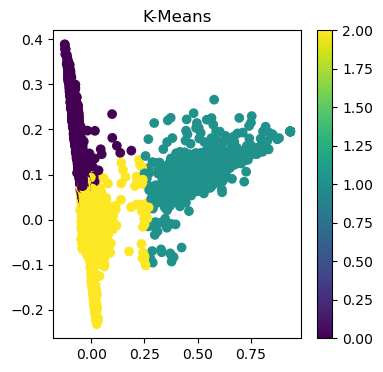

In [83]:
N_SUBCLUSTERS_IN_CLUSTER_2 = 3

tfidf_cluster_2 = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
kmeans_cluster_2 = KMeans(n_clusters=N_SUBCLUSTERS_IN_CLUSTER_2, max_iter=1000, n_init=100)
clusterizator = Clusterization(clusterization_method=kmeans_cluster_2, vectorizer = tfidf_cluster_2, plot_title = "K-Means")

cluster_2_labels = clusterizator.apply(cluster_2['text'])

In [84]:
cluster_2['inner_cluster_labels'] = cluster_2_labels

/var/folders/7x/3pdx41sj3zn7z3q2my_9_frw0000gn/T/ipykernel_41583/3189697875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2['inner_cluster_labels'] = cluster_2_labels


In [87]:
top_k_keywords_in_cluster(df = cluster_2, n_cluster = N_SUBCLUSTERS_IN_CLUSTER_2, k=10)

Ключевые слова для кластера 0 
вакансия навык страна исследователь вытеснение интеллект профессия спойлер спрос неоднородность

Ключевые слова для кластера 1 
элькади турист россиянин преобразование соотношение авиабилет чиновник фактор достижение турпоток

Ключевые слова для кластера 2 
канеман человек искажение суждение психология решение вероятность подталкивание психолог талер



In [89]:
cluster_2.loc[cluster_2['inner_cluster_labels'] == 0, 'Тема'] = "Искусственный интеллект"

/var/folders/7x/3pdx41sj3zn7z3q2my_9_frw0000gn/T/ipykernel_41583/2782530597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2.loc[cluster_2['inner_cluster_labels'] == 0, 'Тема'] = "Искусственный интеллект"


In [90]:
cluster_2.loc[cluster_2['inner_cluster_labels'] == 1, 'Тема'] = "Туризм"

In [142]:
cluster_2.loc[cluster_2['inner_cluster_labels'] == 2, 'Тема'] = "Мировая экономика"

## Анализ третьего кластера

### Кластеризация третьего кластера

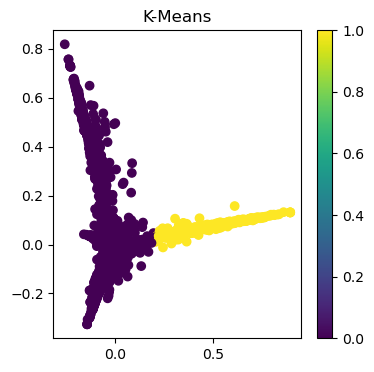

In [108]:
N_SUBCLUSTERS_IN_CLUSTER_3 = 2
tfidf_cluster_3 = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
kmeans_cluster_3 = KMeans(n_clusters=N_SUBCLUSTERS_IN_CLUSTER_3, max_iter=1000, n_init=100)
clusterizator = Clusterization(clusterization_method=kmeans_cluster_3, vectorizer = tfidf_cluster_3, plot_title = "K-Means")

cluster_3_labels = clusterizator.apply(cluster_3['text'])

In [113]:
cluster_3['inner_cluster_labels'] = cluster_3_labels

/var/folders/7x/3pdx41sj3zn7z3q2my_9_frw0000gn/T/ipykernel_41583/2562286174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3['inner_cluster_labels'] = cluster_3_labels


In [114]:
top_k_keywords_in_cluster(df = cluster_3, n_cluster = N_SUBCLUSTERS_IN_CLUSTER_3, k=20, min_df = 0.10, max_df = 0.90)

Ключевые слова для кластера 0 
модель работа устройство связь система приложение задача рынок данные запуск декабрь сфера комплекс объём поставщик тренд оценка основа оборудование программа

Ключевые слова для кластера 1 
центр контроль процесс внедрение специалист сотрудник обработка качество уровень работа точка состояние обучение образ случай требование режим место количество часть



In [123]:
cluster_3.loc[cluster_3['inner_cluster_labels'] == 0, 'Тема'] = "Программное обеспечение"

/var/folders/7x/3pdx41sj3zn7z3q2my_9_frw0000gn/T/ipykernel_41583/2414186228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3.loc[cluster_3['inner_cluster_labels'] == 0, 'Тема'] = "Программное обеспечение"


In [124]:
cluster_3.loc[cluster_3['inner_cluster_labels'] == 1, 'Тема'] = "Автоматизация"

## Разметка кластерами датасета

In [117]:
df.loc[df['labels'] == 0, "Тема"] = cluster_1['Тема']

In [ ]:
df.loc[df['labels'] == 1, "Тема"] = cluster_2['Тема']

In [125]:
df.loc[df['labels'] == 2, "Тема"] = cluster_3['Тема']

In [126]:
df = df[df['date'] != 'Ink_Russia']
df = df[df['date'] != 'date']

In [127]:
df['date'] = df['date'].apply(pd.to_datetime)

/var/folders/7x/3pdx41sj3zn7z3q2my_9_frw0000gn/T/ipykernel_41583/2094182339.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = df['date'].apply(pd.to_datetime)


In [131]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 1.5 MB/s eta 0:00:0000:0100:01m


In [140]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [141]:
with pd.ExcelWriter('разметка по темам.xlsx') as writer:
    df.to_excel(writer)